<a href="https://colab.research.google.com/github/muktaraut12/Mukta_EDA-Capstone_Airbnb-NYC-Analysis/blob/main/Final_Mukta_Airbnb_Bookings_Analysis_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> Since 2008, guests and hosts have used Airbnb to expand on traveling possibilities and present a more unique, personalized way of experiencing the world. Today, Airbnb became one of a kind service that is used and recognized by the whole world. Data analysis on millions of listings provided through Airbnb is a crucial factor for the company. These millions of listings generate a lot of data - data that can be analyzed and used for security, business decisions, understanding of customers' and providers' (hosts) behavior and performance on the platform, guiding marketing initiatives, implementation of innovative additional services and much more. </b>

## <b>This dataset has around 49,000 observations in it with 16 columns and it is a mix between categorical and numeric values. </b>

## <b> In this notebook, we explore and analyze the data to discover following key understandings -
* What can we learn about different hosts and areas?
* What is percentage of listings in each neighbourhood group?
* Which is the host with highest number of listings?
* Find out top 10 neighbourhoods.
* What is the average price, maximum price and minimum price of an airbnb listing by property type?
* What can we learn from predictions? (ex: locations, prices, reviews, etc)
* Which hosts are the busiest and why?
* Find out correlation between different columns.
</b>

In [8]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from datetime import datetime

In [5]:
df = pd.read_csv("/content/contentdrive/MyDrive/Colab Notebooks/AlmaBetter/Mukta_EDA Capstone Project_Airbnb NYC/Airbnb NYC 2019.csv")

In [6]:
df.head(3)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [ ]:
df.isnull().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64


# INFERENCE - 
<b> By using info() on dataframe, we can see that there are some null values in columns name( 16 null values), host_name( 21 null values), last_review and reviews_per_month(10052 null values in each).</b>
    
<b> We also notice there are categorical values in 6 coulmns - name, host_name, neighbourhood, neighbourhood_group, room_type and last_review </b>


In [ ]:
df[df.host_name.isna()]

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
360,100184,Bienvenue,526653,NaN,Queens,Queens Village,40.72413,-73.76133,Private room,50,1,43,2019-07-08,0.45,1,88
2700,1449546,Cozy Studio in Flatbush,7779204,NaN,Brooklyn,Flatbush,40.64965,-73.96154,Entire home/apt,100,30,49,2017-01-02,0.69,1,342
5745,4183989,SPRING in the City!! Zen-Style Tranquil Bedroom,919218,NaN,Manhattan,Harlem,40.80606,-73.95061,Private room,86,3,34,2019-05-23,1.00,1,359
6075,4446862,Charming Room in Prospect Heights!,23077718,NaN,Brooklyn,Crown Heights,40.67512,-73.96146,Private room,50,1,0,NaN,NaN,1,0
6582,4763327,"Luxurious, best location, spa inc'l",24576978,NaN,Brooklyn,Greenpoint,40.72035,-73.95355,Entire home/apt,195,1,1,2015-10-20,0.02,1,0
8163,6292866,Modern Quiet Gem Near All,32722063,NaN,Brooklyn,East Flatbush,40.65263,-73.93215,Entire home/apt,85,2,182,2019-06-19,3.59,2,318
8257,6360224,"Sunny, Private room in Bushwick",33134899,NaN,Brooklyn,Bushwick,40.70146,-73.92792,Private room,37,1,1,2015-07-01,0.02,1,0
8852,6786181,R&S Modern Spacious Hideaway,32722063,NaN,Brooklyn,East Flatbush,40.64345,-73.93643,Entire home/apt,100,2,157,2019-06-19,3.18,2,342
9138,6992973,1 Bedroom in Prime Williamsburg,5162530,NaN,Brooklyn,Williamsburg,40.71838,-73.95630,Entire home/apt,145,1,0,NaN,NaN,1,0
9817,7556587,Sunny Room in Harlem,39608626,NaN,Manhattan,Harlem,40.82929,-73.94182,Private room,28,1,1,2015-08-01,0.02,1,0


In [ ]:
df[df.name.isna()]

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
2854,1615764,NaN,6676776,Peter,Manhattan,Battery Park City,40.71239,-74.01620,Entire home/apt,400,1000,0,NaN,NaN,1,362
3703,2232600,NaN,11395220,Anna,Manhattan,East Village,40.73215,-73.98821,Entire home/apt,200,1,28,2015-06-08,0.45,1,341
5775,4209595,NaN,20700823,Jesse,Manhattan,Greenwich Village,40.73473,-73.99244,Entire home/apt,225,1,1,2015-01-01,0.02,1,0
5975,4370230,NaN,22686810,Michaël,Manhattan,Nolita,40.72046,-73.99550,Entire home/apt,215,7,5,2016-01-02,0.09,1,0
6269,4581788,NaN,21600904,Lucie,Brooklyn,Williamsburg,40.71370,-73.94378,Private room,150,1,0,NaN,NaN,1,0
6567,4756856,NaN,1832442,Carolina,Brooklyn,Bushwick,40.70046,-73.92825,Private room,70,1,0,NaN,NaN,1,0
6605,4774658,NaN,24625694,Josh,Manhattan,Washington Heights,40.85198,-73.93108,Private room,40,1,0,NaN,NaN,1,0
8841,6782407,NaN,31147528,Huei-Yin,Brooklyn,Williamsburg,40.71354,-73.93882,Private room,45,1,0,NaN,NaN,1,0
11963,9325951,NaN,33377685,Jonathan,Manhattan,Hell's Kitchen,40.76436,-73.98573,Entire home/apt,190,4,1,2016-01-05,0.02,1,0
12824,9787590,NaN,50448556,Miguel,Manhattan,Harlem,40.80316,-73.95189,Entire home/apt,300,5,0,NaN,NaN,5,0


# Data Cleaning - 

In [ ]:
#replace the null values with 0 in columns reviews_per_month 
df['reviews_per_month'] = df['reviews_per_month'].fillna(0)

In [ ]:
df['reviews_per_month'].isnull().any()

False

In [ ]:
# replace the null values in last_review column with forward fill, 
# which will propagate last valid observation forward to next 
df['last_review'].fillna(method="ffill", inplace=True)


In [ ]:
#let us now find out if there are any duplicate values in the dataset using duplicated() function
# Use the keep parameter to consider only the first instance of a duplicate row to be unique
b_series = df.duplicated(keep='first')

# The `~` sign is used for negation. 
df = df[~b_series]
df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

# What can we learn about different hosts and areas?

In [ ]:
df.host_id.nunique()

37457

In [ ]:
df.neighbourhood_group.unique()
#df.neighbourhood_group.nunique()

array(['Brooklyn', 'Manhattan', 'Queens', 'Staten Island', 'Bronx'],
      dtype=object)

In [ ]:
#let us find out number of listings in each neighbourhood
df.groupby(['neighbourhood_group'])['calculated_host_listings_count'].sum()

neighbourhood_group
Bronx              2437
Brooklyn          45925
Manhattan        277073
Queens            23005
Staten Island       865
Name: calculated_host_listings_count, dtype: int64

<AxesSubplot:xlabel='latitude', ylabel='longitude'>

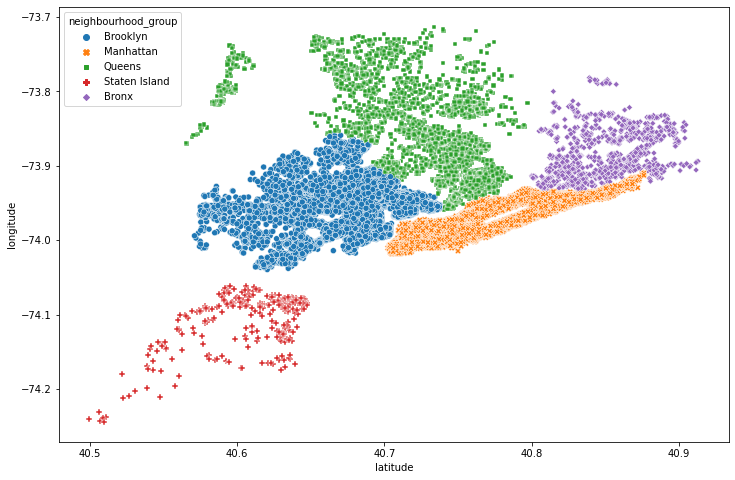

In [ ]:
#let us find out at which location, the maximum number of hosts are located
# we can use latitude and longitude coulmns for that.
plt.figure(figsize = (12,8))
#plt.title("Neighbourhood group with highest listings")
sns.scatterplot(data=df, x="latitude", y="longitude", hue="neighbourhood_group", style='neighbourhood_group')

# Let us find out percentage of listings in each neighbourhood

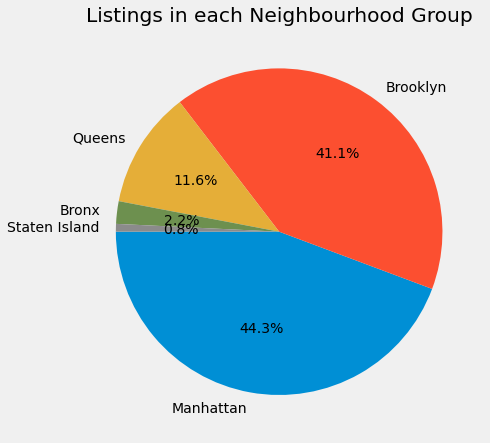

In [ ]:
plt.style.use('fivethirtyeight')
plt.figure(figsize=(13,7))
plt.title("Listings in each Neighbourhood Group")
g = plt.pie(df.neighbourhood_group.value_counts(), labels=df.neighbourhood_group.value_counts().index,autopct='%1.1f%%', startangle=180)
plt.show()

In [ ]:
df.room_type.unique()

array(['Private room', 'Entire home/apt', 'Shared room'], dtype=object)

In [ ]:
df.host_name.nunique()

11452

In [ ]:
df.neighbourhood.nunique()

221

# INFERENCE - 
<b>
   
1. We have <u>37,457 unique hosts</u> across 5 neighbourhoods namely <u>Brooklyn, Manhattan, Queens, Staten Island and Bronx.</u>
2. Maximum number of listings are in <u>Manhattan (277073 listings)</u>, followed by Brooklyn (45,925 listings).
3. Least number of listings are in Staten Island (865 listings).
4. We have 3 types of rooms - <u>Private room, Entire home/apartment and Shared room </u></b>

# Find out the host with highest number of listings

In [ ]:
#let us find out maximum listings from a single host
max_listings = max(df.calculated_host_listings_count)

#find out the host with max number of listings
max_host = df[df['calculated_host_listings_count']== max_listings].max()
print("Highest number of listings for one host is ", max_listings)

Highest number of listings for one host is  327


In [ ]:
df_max_host = pd.DataFrame(max_host)
df_max_host

,0
id,35937891
name,Superior 1BR in Midtown East by Sonder
host_id,219517861
host_name,Sonder (NYC)
neighbourhood_group,Manhattan
neighbourhood,Upper East Side
latitude,40.76447
longitude,-73.96295
room_type,Private room
price,699


# INFERENCE
<b> Highest number of listings is <u>327</u> <b>
    
<b> The host with highest number of listings is <u>Sonder (NYC)</u> by Name <u>Superior 1BR in Midtown East by Sonder</u> </b>

# Find out top 10 popular neighbourhoods

<BarContainer object of 10 artists>

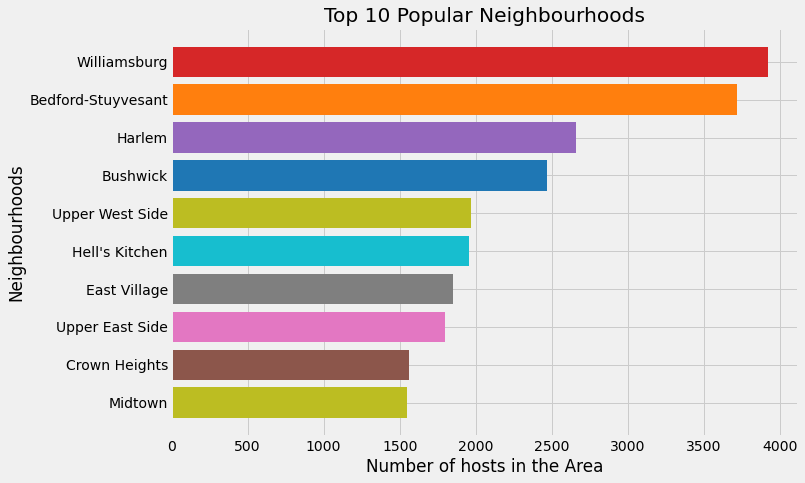

In [ ]:
#find out the first 10 records in neighbourhood using value_counts() function
data = df['neighbourhood'].value_counts()[:10]
plt.figure(figsize=(10, 7))
x = list(data.index)
y = list(data.values)
x.reverse()
y.reverse()

plt.title("Top 10 Popular Neighbourhoods")
plt.ylabel("Neighbourhoods")
plt.xlabel("Number of hosts in the Area")
colors = ['tab:olive','tab:brown','tab:pink','tab:gray','tab:cyan','tab:olive','tab:blue','tab:purple','tab:orange','tab:red']
plt.barh(x, y, color=colors, animated=True, capstyle='projecting')

In [ ]:
#let us consider only columns host_id, neighburhood,  neighbourhood_group, room_type, price, number_of_reviews and availability_365

df1 = df[['host_id', 'host_name', 'neighbourhood_group', 'neighbourhood', 'room_type', 'price', 'minimum_nights', 'number_of_reviews', 'availability_365']]

In [ ]:
df1.head(2)

,host_id,host_name,neighbourhood_group,neighbourhood,room_type,price,minimum_nights,number_of_reviews,availability_365
0,2787,John,Brooklyn,Kensington,Private room,149,1,9,365
1,2845,Jennifer,Manhattan,Midtown,Entire home/apt,225,1,45,355


# What is the average price, maximum price and minimum price of an airbnb listing by property type?

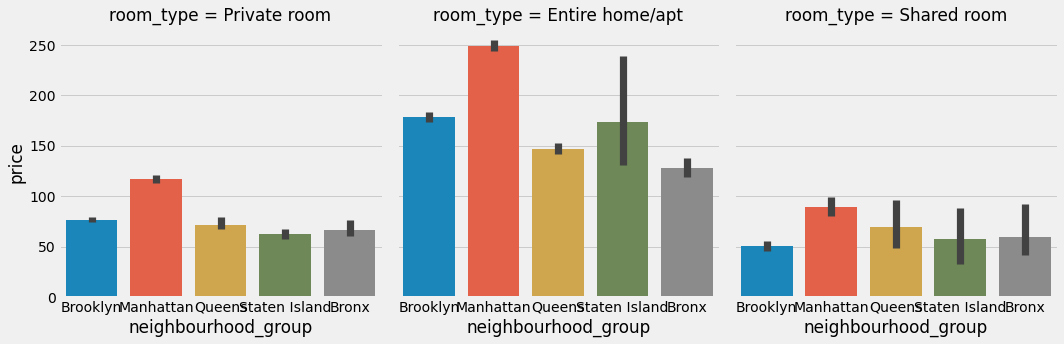

In [ ]:
sns.catplot(x='neighbourhood_group',
            y='price',
            data=df1,
            kind='bar',
            col='room_type');

In [ ]:
#let us find out maximum price of listing in all neighbourhood_groups
data = df1.groupby(['neighbourhood_group'])['price'].max()
df02 = pd.DataFrame(data)
print("Maximum price in each neighbourhood_group is as follows - ")
df02

Maximum price in each neighbourhood_group is as follows - 


,price
neighbourhood_group,
Bronx,2500
Brooklyn,10000
Manhattan,10000
Queens,10000
Staten Island,5000


In [ ]:
data = df1.groupby(['neighbourhood_group'])['price'].mean().round(2)
df03 = pd.DataFrame(data)
print("Average price in each neighbourhood_group is as follows - ")
df03

Average price in each neighbourhood_group is as follows - 


,price
neighbourhood_group,
Bronx,87.50
Brooklyn,124.38
Manhattan,196.88
Queens,99.52
Staten Island,114.81


In [ ]:
data = df1.groupby(['neighbourhood_group'])['price'].min().round(2)
df04 = pd.DataFrame(data)
print("Minimum price in each neighbourhood_group is as follows - ")
df04

Minimum price in each neighbourhood_group is as follows - 


,price
neighbourhood_group,
Bronx,0
Brooklyn,0
Manhattan,0
Queens,10
Staten Island,13


In [ ]:
# now let us find maximum, minimum and avarage price of listing is entire dataset
print(f"Average price per night : ${df.price.mean():.2f}")
print(f"Maximum price per night : ${df.price.max()}")
print(f"Minimum price per night : ${df.price.min()}")

Average price per night : $152.72
Maximum price per night : $10000
Minimum price per night : $0


# INFERENCE - 

<b> In above visualization, we can see the room prices in each neighbourhood in accordance with room type.<b/>
<li><b>
<ol>In all three types of room, <u>Manhatten is the most expensive neighbourhood.</u></ol>
<ol> <u>Bronx</u> is where you can get <u>Entire home/appartment</u> in the <u>lowest price</u>.</ol>
    <ol> <u>Staten Island</u> is where you can get <u>Private room</u> for the lowest price.</ol>
    <ol> In <u>Brooklyn</u>, we an get <u>Shared room</u> for lowest price.</ol> </b>
</li>

Average price per night : $152.72

Minimum price per night : $0

Maximum price per night : $10000


# What can we learn from predictions? (ex: locations, prices, reviews, etc)

In [ ]:
plt.figure(figsize=(20,10))

<Figure size 1440x720 with 0 Axes>

<Figure size 1440x720 with 0 Axes>

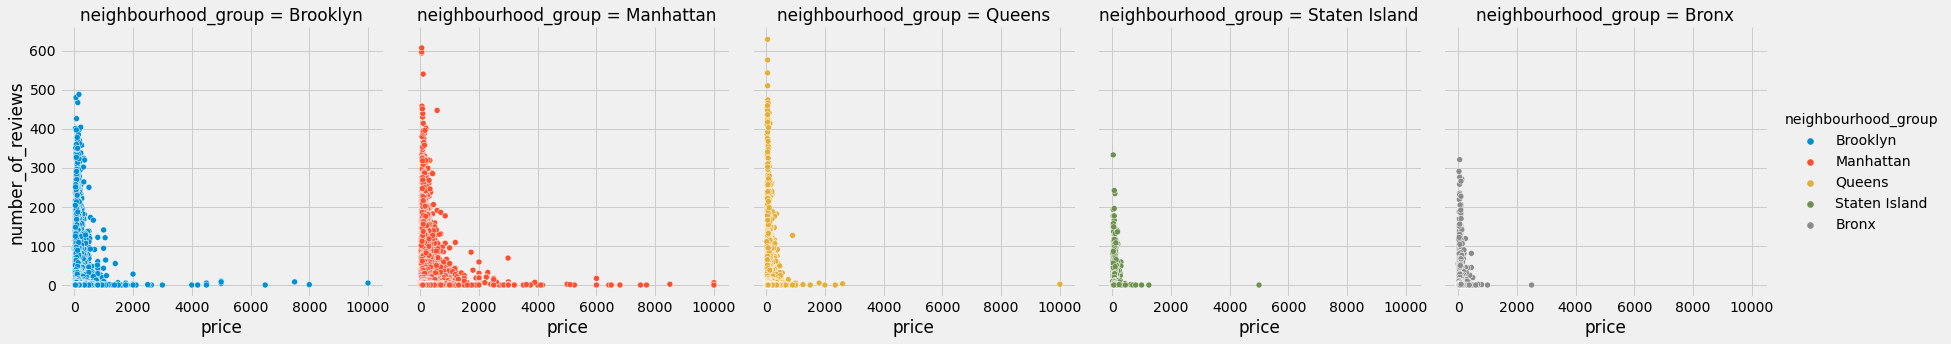

In [ ]:
# Let us find out relation between price of a listing and number of reviews for that listing
sns.relplot(
    data=df, x="price", y="number_of_reviews",
    hue="neighbourhood_group", col="neighbourhood_group", kind="scatter",
)

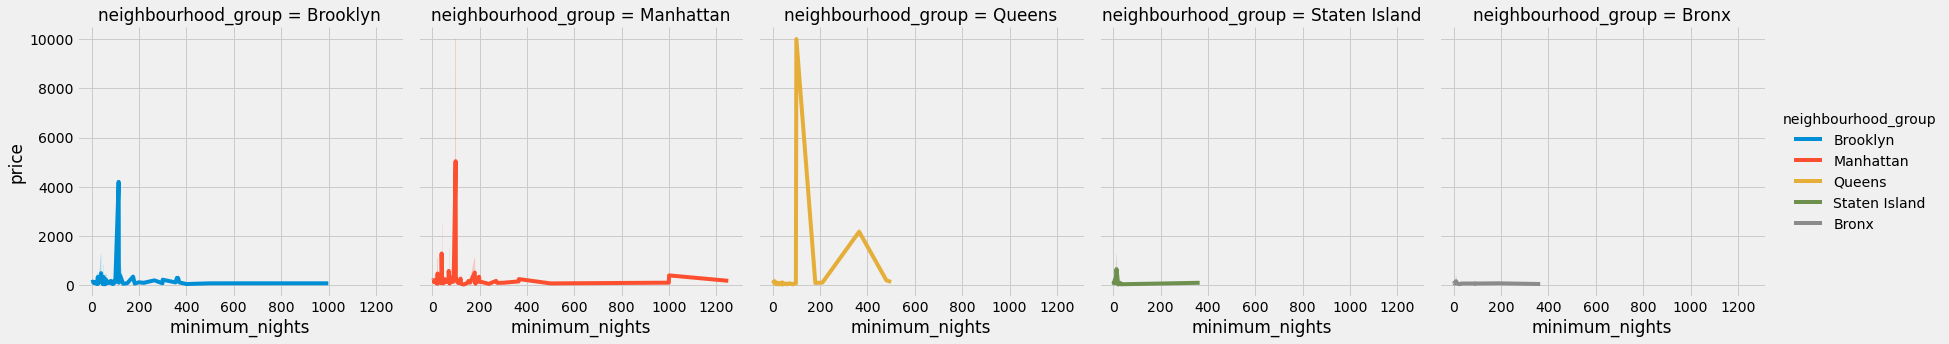

In [ ]:
# Let us find relationship between minimum_nights and price of the listing
sns.relplot(data = df, x='minimum_nights', y='price', hue="neighbourhood_group", kind="line", col="neighbourhood_group")

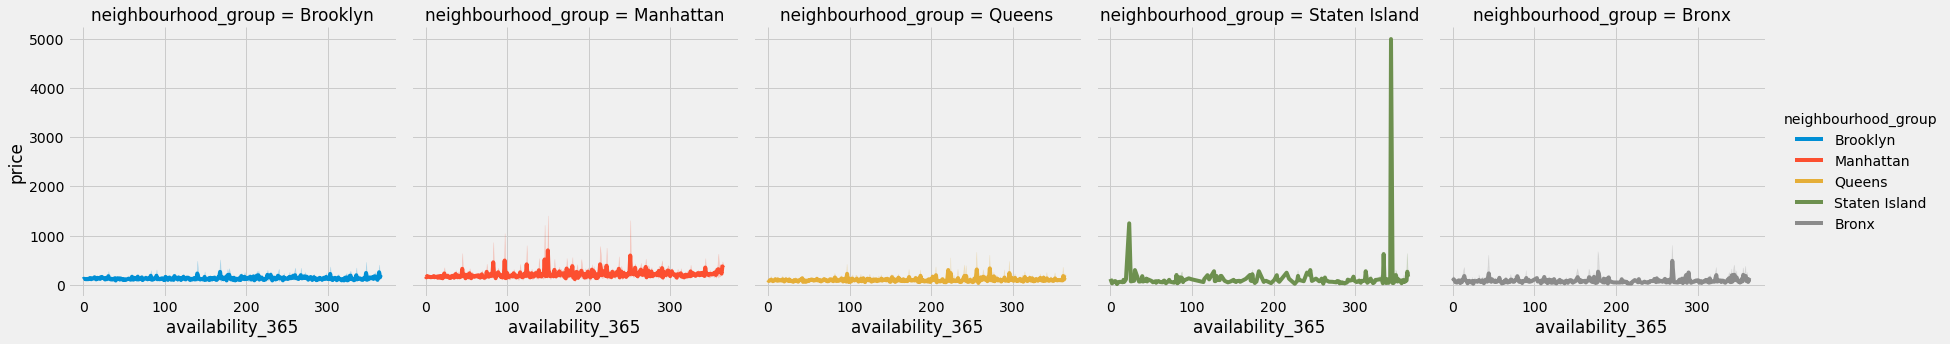

In [ ]:
sns.relplot(data = df, x='availability_365', y='price', hue="neighbourhood_group", kind="line", col="neighbourhood_group")

# Room availability in each of the neighbourhood_group

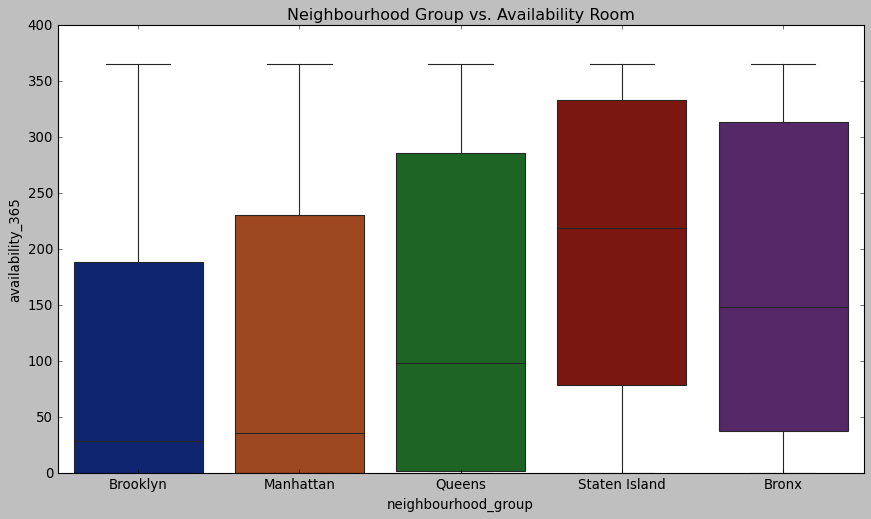

In [ ]:
# let us find out room availability in each of the neighbourhood_group
plt.style.use('classic')
plt.figure(figsize=(13,7))
plt.title("Neighbourhood Group vs. Availability Room")
sns.boxplot(data=df, x='neighbourhood_group',y='availability_365',palette="dark")
plt.show()

# INFERENCE - 
<b>1. Maximum reviews are for Queens, followed by Manhattan. So we can infer that <u>Queens listings has maximum number of visitors</u>.
2. As we increase minimum number of nights, the listing price decreases.
3.<u> Visitors prefer lower price listings</u>. As the price increases, the number of reviews decreases.
4. 365 days availability do not influence the listing price, except in case of Staten Island, where prices are more for listings that are available for all 365 days.
5. In <u>Queens,</u> we find <u>maximum days availability</u> of properties.</b>
 

# Which hosts are the busiest and why?

In [ ]:
data = df1.groupby('neighbourhood_group')['number_of_reviews'].max()

In [ ]:
pd.DataFrame(data)
data = data.sort_values(ascending=False)
print(data)

neighbourhood_group
Queens           629
Manhattan        607
Brooklyn         488
Staten Island    333
Bronx            321
Name: number_of_reviews, dtype: int64


In [ ]:
# let us find out the busiest host in Queens 
data = df.groupby(['name','host_name','neighbourhood_group','availability_365'])['number_of_reviews'].max()
df0003 = pd.DataFrame(data)

In [ ]:
print(df0003[df0003['number_of_reviews'] == df0003['number_of_reviews'].max()])

                                                                        number_of_reviews
name                    host_name neighbourhood_group availability_365                   
Room near JFK Queen Bed Dona      Queens              333                             629


# INFERENCE - 
<b> We can conclude that the busiest host is <u>'Dona' in Queens </u>, with <u>629</u> reviews. Name of the Listing is <u>'Room near JFK Queen Bed'. </u></b>
    
<b>The reason behind this can be that this listing is in the most busy neighbourhood and has<u> 333 days availability.</u></b>

# Find out correlation between different columns 

<AxesSubplot:>

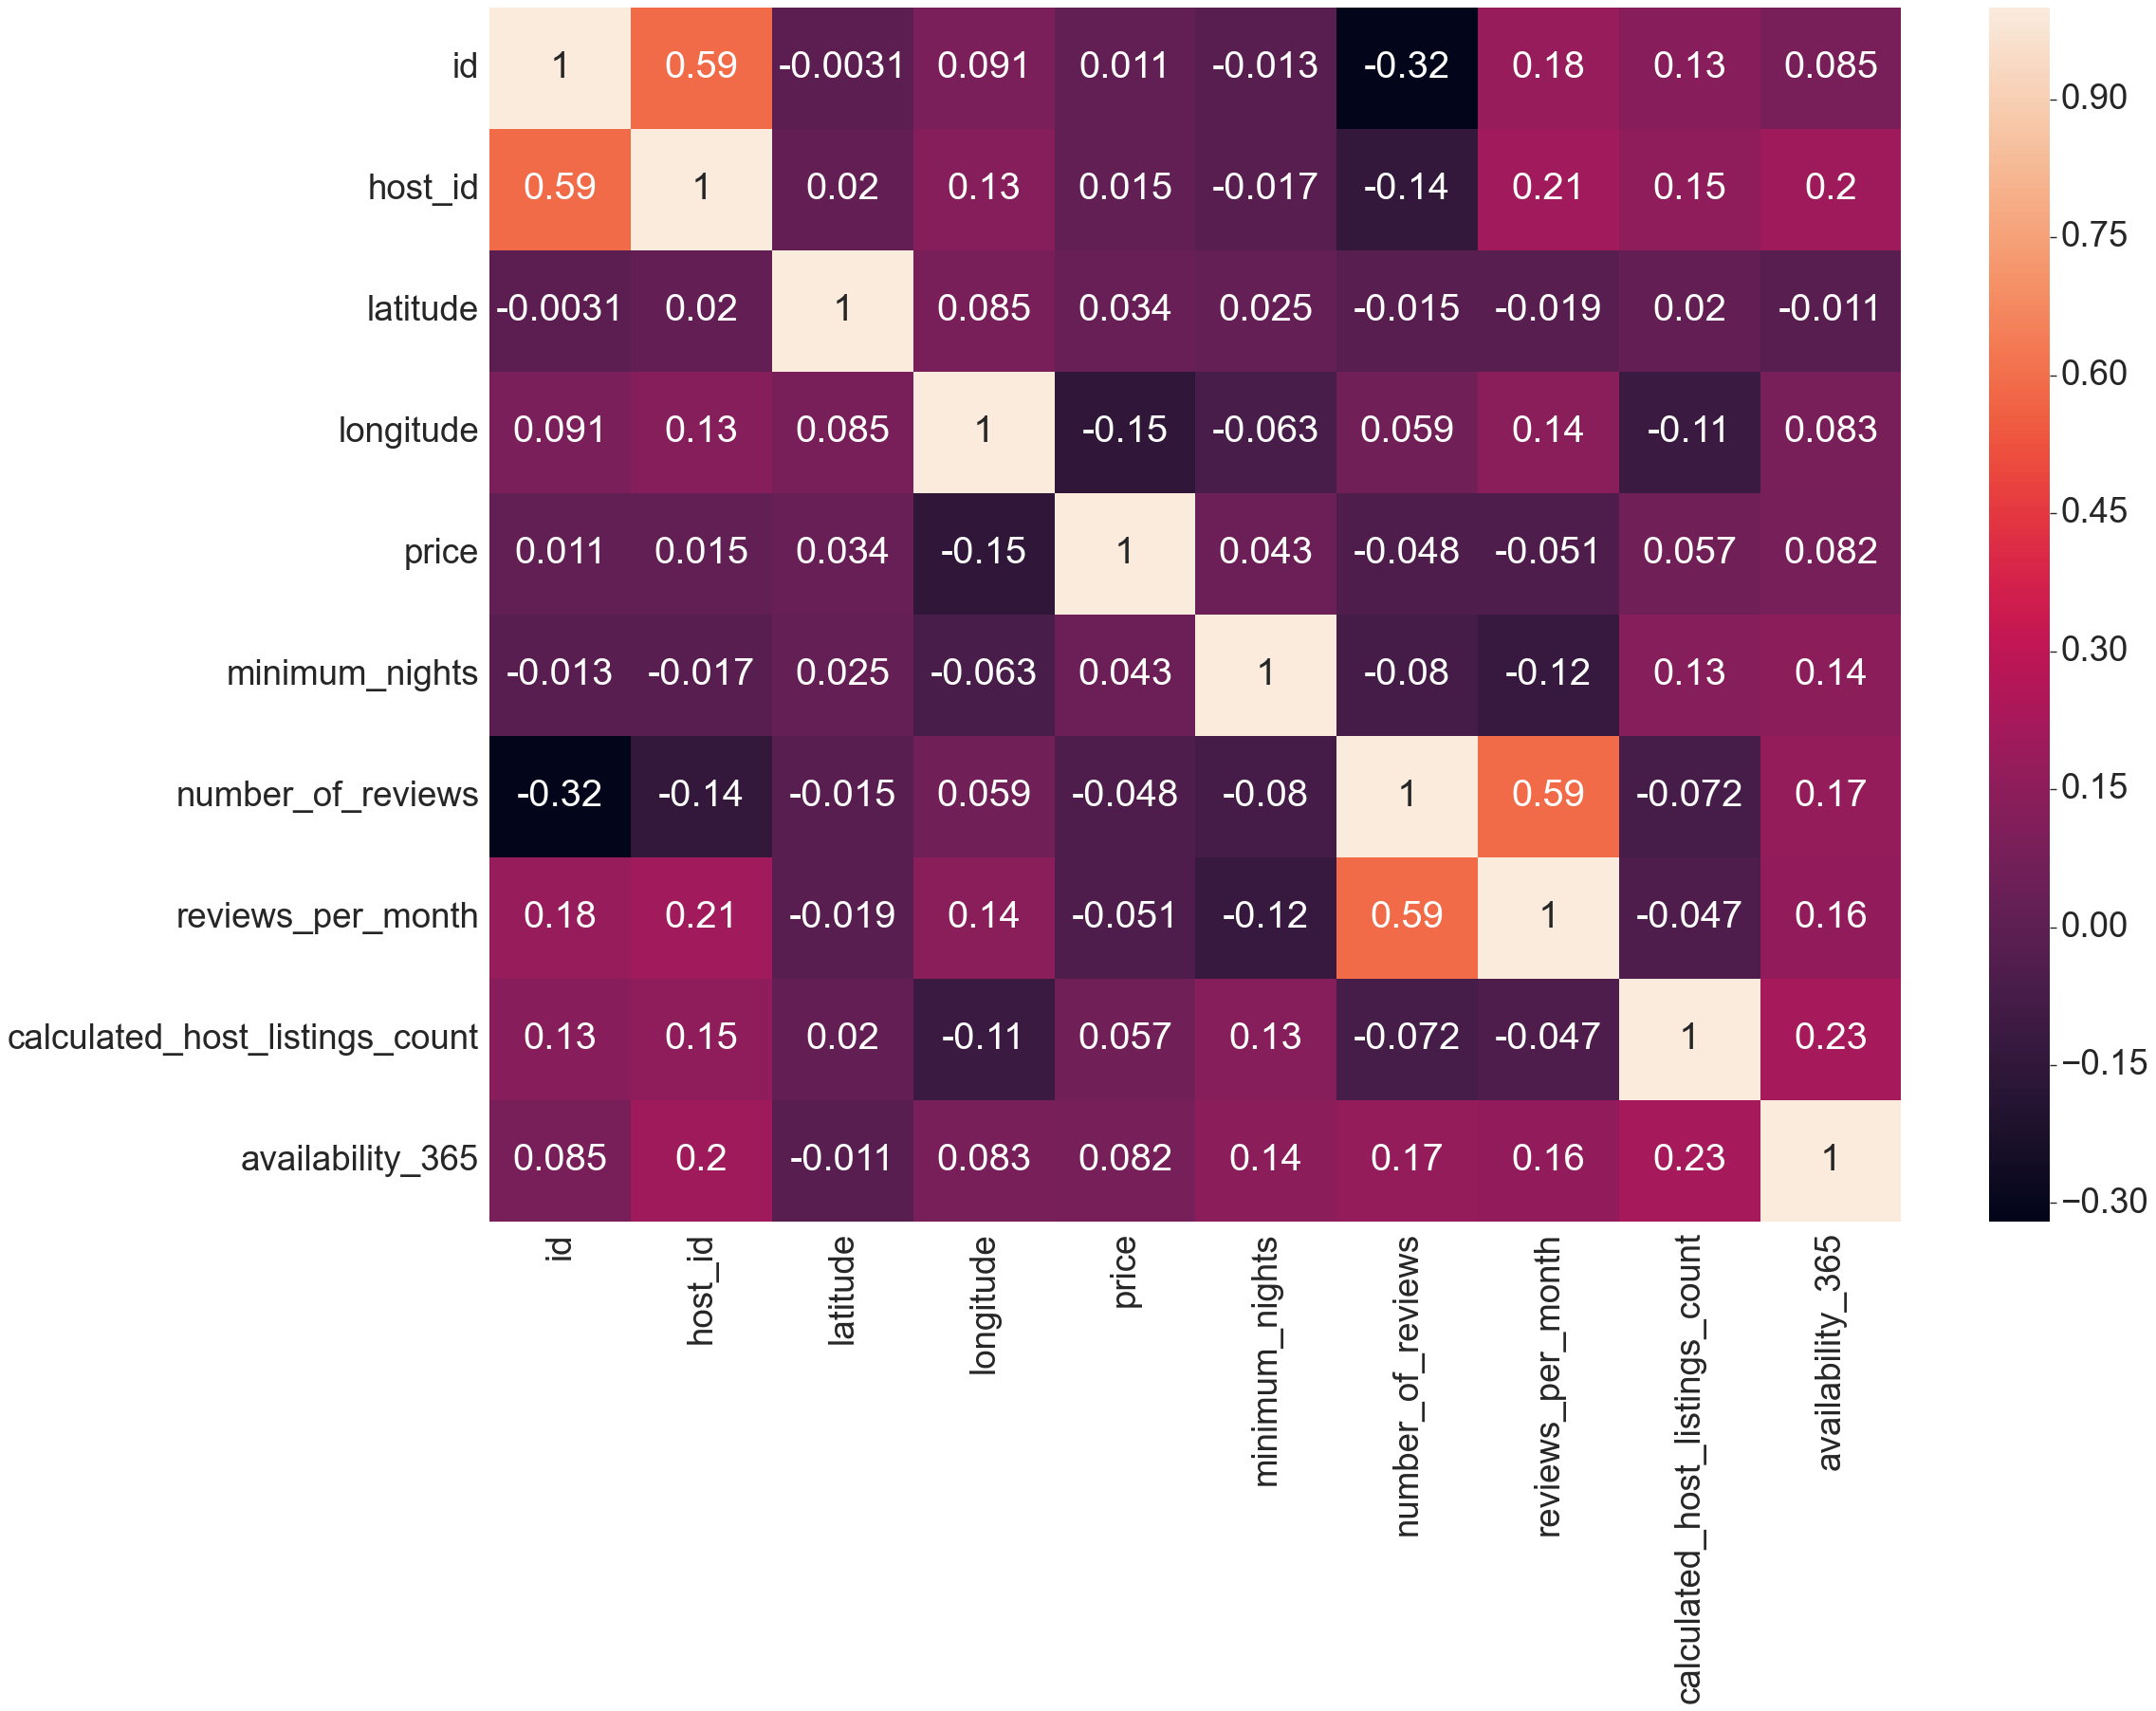

In [ ]:
# correlation matrix
sns.set(font_scale=3)
plt.figure(figsize=(30, 20))
sns.heatmap(df.corr(), annot=True)

# INFERENCE - 
<b> We can observe from correlation matrix, there is <u>no strong correlation between coulmns</u> in the dataset, except for number_of_reviews and reviews_per_month</b>
<b> We can see that ‘number_of_reviews’ and ‘reviews_per_month’ are positively correlated. Therefore we can expect a higher rate of reviews per month if there is more number of reviews.</b>

<b> We can observe a negative correlation between ‘price’ and ‘number_of_reviews’. It concludes that properties with lower prices are more likely to be booked and thus have more number of reviews.</b>